In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from skimage.feature import hog, match_template
from skimage import data, exposure
from numpy import fft
import cv2

# Load the .mat file
data = loadmat('car_devkit\devkit\cars_meta.mat')

# Initialize an empty list to store the unpacked elements
#unpacked_data = []

# Iterate through each element in the data['annotations'] array
#for annotation in data['annotations'][0]:
#    relative_im_path = annotation[0][0]
##    bbox_x1 = annotation[1][0][0]
 #   bbox_y1 = annotation[2][0][0]
  #  bbox_x2 = annotation[3][0][0]
   # bbox_y2 = annotation[4][0][0]

    # Append the unpacked elements to the list
    #unpacked_data.append([relative_im_path, bbox_x1, bbox_y1, bbox_x2, bbox_y2])

# Convert the list to a pandas DataFrame
#df = pd.DataFrame(unpacked_data,
                  #columns=['relative_im_path', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2'])

# Display the DataFrame
#print(df.head())

#df_class_names = pd.DataFrame({'class_names': data['class_names'][0], 'class_id': range(1, 197)})
#df_class_names['class_names'] = df_class_names['class_names'].apply(lambda x: x[0])

# Merge df with df_class_names on 'class_id'
#df = df.merge(df_class_names, on='class_id')

In [15]:
#print(data['class_names'][0])

for line in data['class_names'][0]:
    print(line[0])

AM General Hummer SUV 2000
Acura RL Sedan 2012
Acura TL Sedan 2012
Acura TL Type-S 2008
Acura TSX Sedan 2012
Acura Integra Type R 2001
Acura ZDX Hatchback 2012
Aston Martin V8 Vantage Convertible 2012
Aston Martin V8 Vantage Coupe 2012
Aston Martin Virage Convertible 2012
Aston Martin Virage Coupe 2012
Audi RS 4 Convertible 2008
Audi A5 Coupe 2012
Audi TTS Coupe 2012
Audi R8 Coupe 2012
Audi V8 Sedan 1994
Audi 100 Sedan 1994
Audi 100 Wagon 1994
Audi TT Hatchback 2011
Audi S6 Sedan 2011
Audi S5 Convertible 2012
Audi S5 Coupe 2012
Audi S4 Sedan 2012
Audi S4 Sedan 2007
Audi TT RS Coupe 2012
BMW ActiveHybrid 5 Sedan 2012
BMW 1 Series Convertible 2012
BMW 1 Series Coupe 2012
BMW 3 Series Sedan 2012
BMW 3 Series Wagon 2012
BMW 6 Series Convertible 2007
BMW X5 SUV 2007
BMW X6 SUV 2012
BMW M3 Coupe 2012
BMW M5 Sedan 2010
BMW M6 Convertible 2010
BMW X3 SUV 2012
BMW Z4 Convertible 2012
Bentley Continental Supersports Conv. Convertible 2012
Bentley Arnage Sedan 2009
Bentley Mulsanne Sedan 2011
Ben

In [3]:
image = plt.imread("cars_train\cars_train\\00664.jpg")
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, channel_axis=-1)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

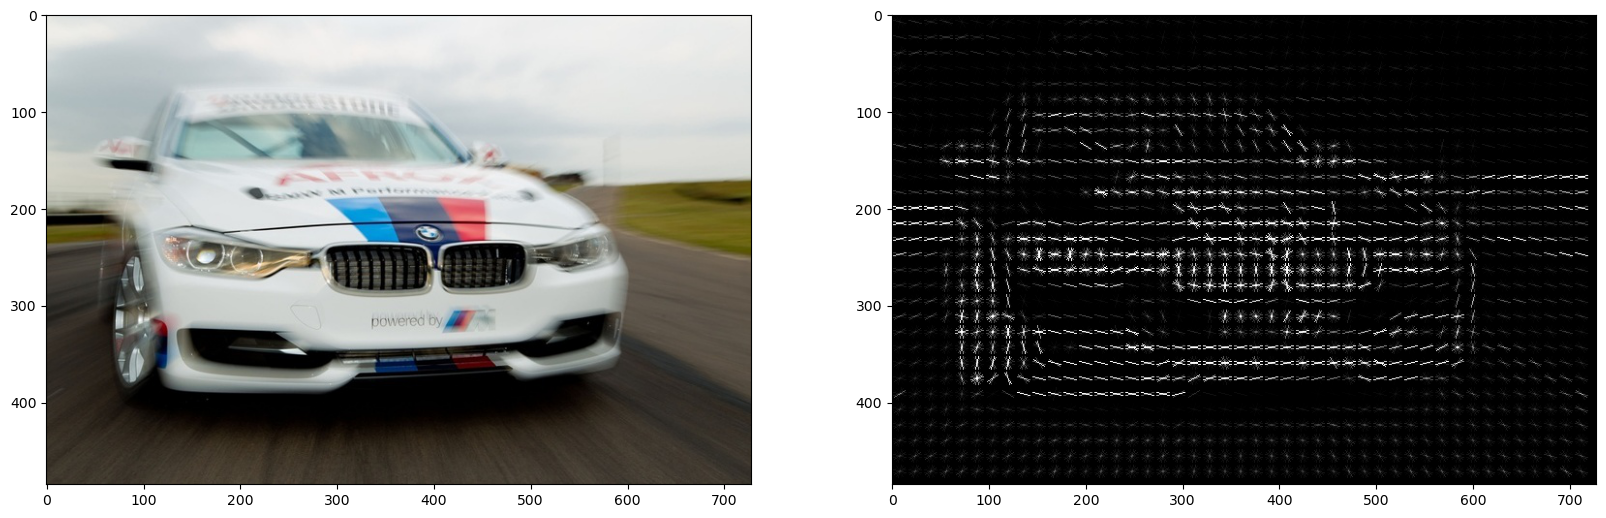

In [4]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(hog_image_rescaled, cmap='gray')
plt.show()

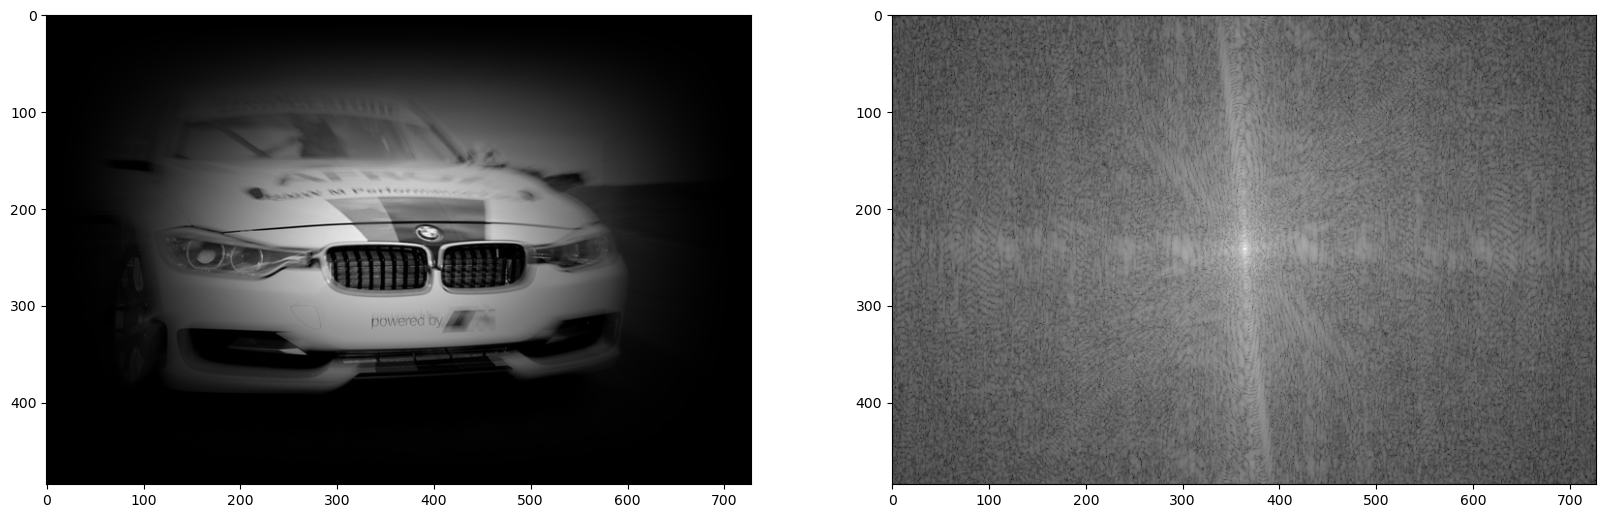

In [5]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

[ydim, xdim] = gray_img.shape
win = np.outer(np.hanning(ydim), np.hanning(xdim))
win = win / np.mean(win)
F = fft.fftshift(fft.fft2(gray_img*win))
Fmag = np.abs(F)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(gray_img*win, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(np.log(Fmag), cmap='gray')
plt.show()

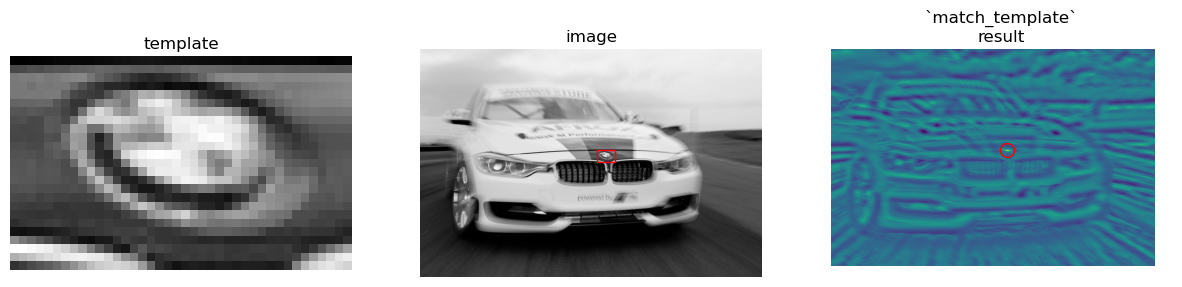

In [49]:
emblem = gray_img[215:240, 375:415]

#bmwemblem = plt.imread("bmw50.png")
#gray_bmwemblem = cv2.cvtColor(emblem, cv2.COLOR_BGR2GRAY)


result = match_template(gray_img, emblem)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(15, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(emblem, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(gray_img, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hemblem, wemblem = emblem.shape
rect = plt.Rectangle((x, y), wemblem, hemblem, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

In [50]:
import cv2

img = cv2.imread("cars_train\cars_train\\00998.jpg")
template = cv2.imread("chevrolet75black.jpg")

# Perform normalized cross-correlation
result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)

# Threshold the result to find matches
threshold = 0.62
locations = np.where(result >= threshold)

# Draw rectangles around the matched regions
for pt in zip(*locations[::-1]):
    cv2.rectangle(img, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 255, 0), 2)

cv2.imshow('Detected Objects', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
!pip install umap-learn

     ---------------------------------------- 88.8/88.8 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 56.9/56.9 kB 3.1 MB/s eta 0:00:00
